**QUESTION:**

In the example of a Heart dataset (Heart.csv), a binary outcome (AHD) for patients who presented with chest pain is given. An outcome of Yes indicates the presence of heart disease based on an angiographic test. There are 13 predictors including Age, Sex, Chol (a cholesterol measurement), and other heard and lung function measurements. Fit a decision tree for prediction of heart disease and interpret your results.

In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/Heart - Heart.csv


In [42]:
# Import the necessary libraries

from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import export_graphviz
import graphviz

In [43]:
# Read the data 

data=pd.read_csv("/kaggle/input/heart-disease/Heart - Heart.csv")
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [44]:
# Remove the unnecessary columns

data=data.drop('Unnamed: 0',axis=1)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [46]:
# check for any missing values

missing_values = data.isna().sum()
print(missing_values)

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64


In [47]:
 # Replace missing values with column means

data_cleaned = data.fillna(data.mean()) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
# Assuming X contains the predictor variables and y contains the outcome variable

X = data_cleaned.drop('AHD', axis=1)
y = data_cleaned['AHD']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical variables
categorical_cols = ['ChestPain','Thal']

# these are numeric predictors
numeric_cols = ['Age','Sex', 'Chol','RestBP','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca']  

# one-hot encode the categorical variables
encoder = OneHotEncoder(sparse=False)
X_categorical = encoder.fit_transform(X[categorical_cols])
X_categorical = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the one-hot encoded categorical variables with the numeric variables
X_processed = pd.concat([X_categorical, X.drop(categorical_cols, axis=1)], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Fit the decision tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.8032786885245902


We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.

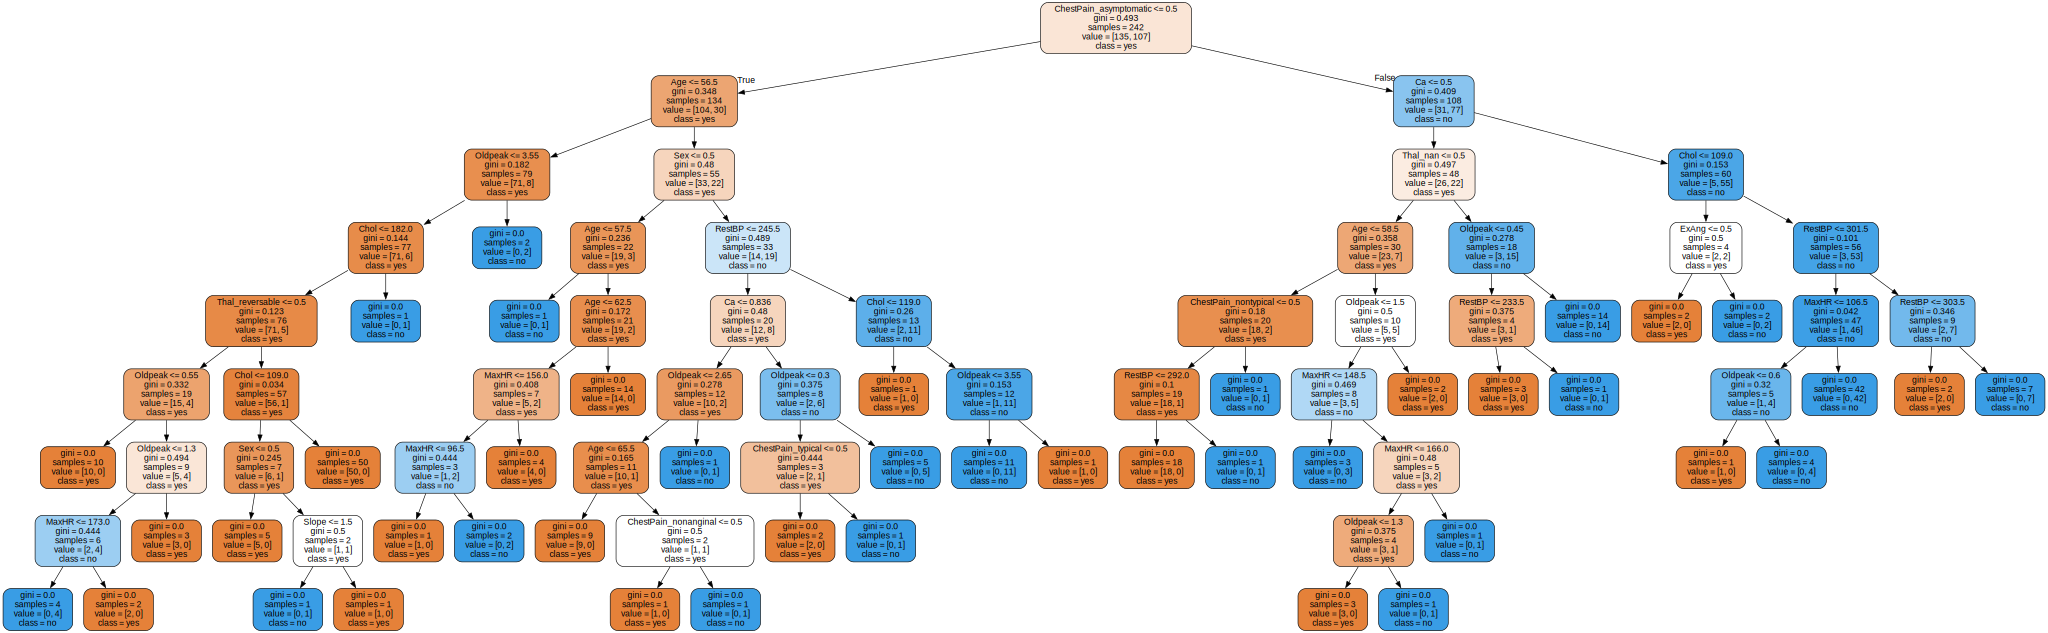

In [49]:
dot_data = export_graphviz(dtree, filled=True, rounded=True, 
class_names=["yes", "no"], 
feature_names=['ChestPain_asymptomatic',  'ChestPain_nonanginal','ChestPain_typical',  'Thal_fixed',  'Thal_normal',  'Thal_reversable'  ,'Thal_nan',  'ChestPain_nontypical','Age','Sex', 'Chol','RestBP','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca'], 
out_file="dot_data.dot")
with open("dot_data.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**CONCLUSION:**

The visualization of the tree provides a great in-depth view of how the algorithm makes predictions, and is a good example of a machine learning algorithm that is easily explained to nonexperts.

Looking at the decision tree figure, we can now nicely trace back the splits that the decision tree determined from our training dataset. We started with 242 samples at the root and split them into two child nodes with 134 and 108 samples, using the ChestPain_asymptomatic ≤ 0.5. After successive splits, we can see that all the leaf nodes are pure and only contains either 'yes' or 'no' classes (Gini impurity = 0).

Also the accuracy on test data is 0.80 which indicates a good classifier model.